In [4]:
import json
from pprint import pprint 
# Open the data file 
file = open("cs1064_worked_examples_data.json")
data = json.load(file)

## Break down of number of students that attempted and completed the problems

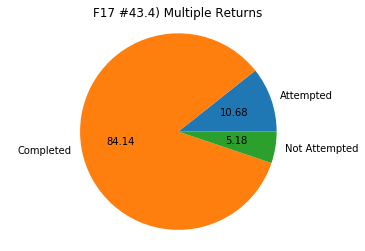

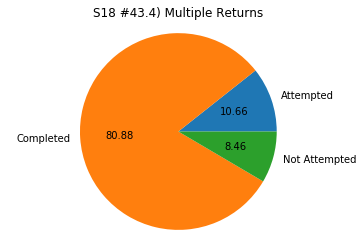

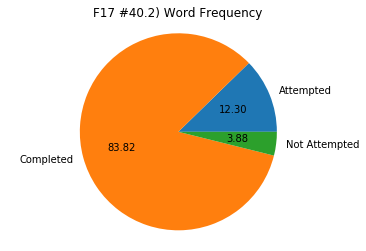

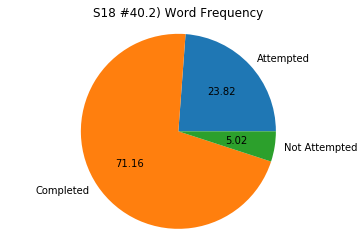

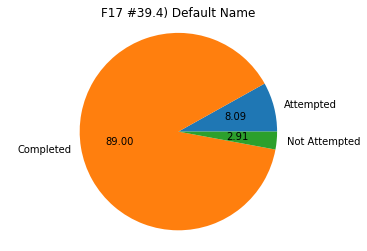

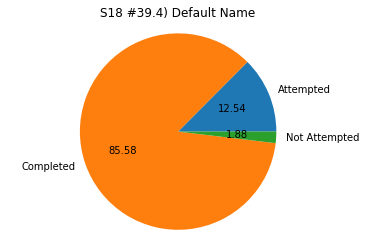

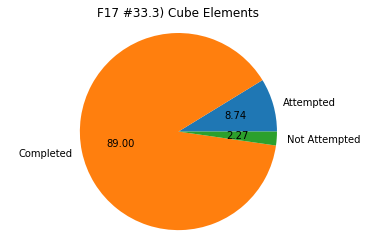

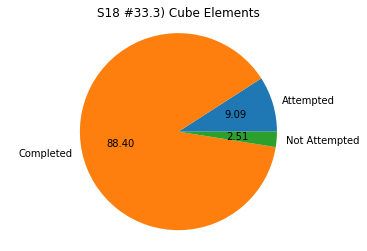

In [7]:
import numpy as np
import matplotlib.pyplot as plt

labels = "Attempted", "Completed", "Not Attempted"
ASSIGNMENTS = ['#43.4) Multiple Returns',
               '#40.2) Word Frequency',
               '#39.4) Default Name',
               '#33.3) Cube Elements']

# Holds data for each assignment 
f17Data = {name: {'name': name,
            'attempted': 0,
            'completed': 0,
            'not_attempted': 0} for name in ASSIGNMENTS}
s18Data = {name: {'name': name,
            'attempted': 0,
            'completed': 0,
            'not_attempted': 0} for name in ASSIGNMENTS}

for student in data:
    assignments = student["assignment"]
    problems = f17Data if student["user"]["section"] == "Fall 2017" else s18Data
    for problem_name, problem in problems.items():
        assign = assignments[problem_name]
        if assign["correct"]:
            problem["completed"] = problem["completed"]+ 1
        elif assign["attempted"]:
            problem["attempted"] = problem["attempted"] + 1
        else:
            problem["not_attempted"] = problem["not_attempted"] + 1
            
for assignment in ASSIGNMENTS:
    problem = f17Data[assignment]
    sizes = [problem["attempted"], problem["completed"], problem["not_attempted"]]
    plt.pie(sizes, labels=labels, autopct="%.2f")
    plt.title("F17 " + problem["name"])
    plt.axis('equal')
    plt.show()
    problem = s18Data[assignment]
    sizes = [problem["attempted"], problem["completed"], problem["not_attempted"]]
    plt.pie(sizes, labels=labels, autopct="%.2f")
    plt.title("S18 " + problem["name"])
    plt.axis('equal')
    plt.show()